# <center>TP Nro 2: Aplicaciones de la DFT 1C </center>
### Integrantes: Franco Areco - Ezequiel Di Laudo - Luna Isaías


Librerías usadas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dsp_tp2 import *

## <u>Ejercicio 1</u>:
Generar una señal discreta, a partir de una señal $x(t)$, de un 1 segundo de duración, compuesta por
tres funciones $x_1(t)+ x_2(t) + x_3(t)$ como se definen a continuación:

$x_1 (t) = 2$ <br>
$x_2 (t) = cos(2 \pi f_2 t) e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;f_2 = 10kHz$ $\mu_2 = 0.2s$ $\sigma_2 = 0.05s$<br> 
$x_3 (t) = sen(2 \pi f_3 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 10.1kHz$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$<br>


En todos los casos, la frecuencia de muestreo es <b>$f_s = 44.1$kHz </b>. Graficar cada señal por separado y
la señal total.

Graficar la magnitud (en escala lineal y en dB) y la fase de la transformada de Fourier (DFT) de la
señal total. Indicar qué representan las componentes no nulas. El eje de frecuencia debe estar en Hz.

In [2]:
## Definción de constantes
T = 1
sr = 44100    
t = np.linspace(0,T,sr)
freq2 = 10000        
u2 = 0.2          
s2 = 0.05
freq3 = 10100
u3 = 0.7
s3 = 0.07
amplitud1 = 2


#Funcion x1
x1 = amplitud1*np.ones_like(t)

#Funcion x2
val1 = np.cos((np.pi)*2*freq2*t)
val2 = np.exp(-((t-u2)**2)/(2*(s2**2)))
x2 = val1*val2

#Funcion x3
val3 = np.sin((np.pi)*2*freq3*t)             
val4 = np.exp((-1)*((t-u3)**2)/(2*(s3**2)))    
x3 = val3*val4

       
#función suma
signal1 = x1+x2+x3

#función dB
signal1_dB = 20*np.log(signal1/np.max(abs(signal1)))





### FFT

In [3]:
samples1= 1000 #agrego más muestras para zero_padding
dft_signal1 = np.fft.rfft(signal1)
freq = np.fft.rfftfreq(len(signal1), 1/sr)

dft_db= abs(dft_signal1)/np.max(abs(dft_signal1))

max_dft= max(abs(dft_db[95:10800]))
fre_max= np.where(abs(dft_db[95:10800]) == max_dft)

print(max_dft)
print(fre_max)

0.043642721595080355
(array([10005], dtype=int64),)


#### Plot

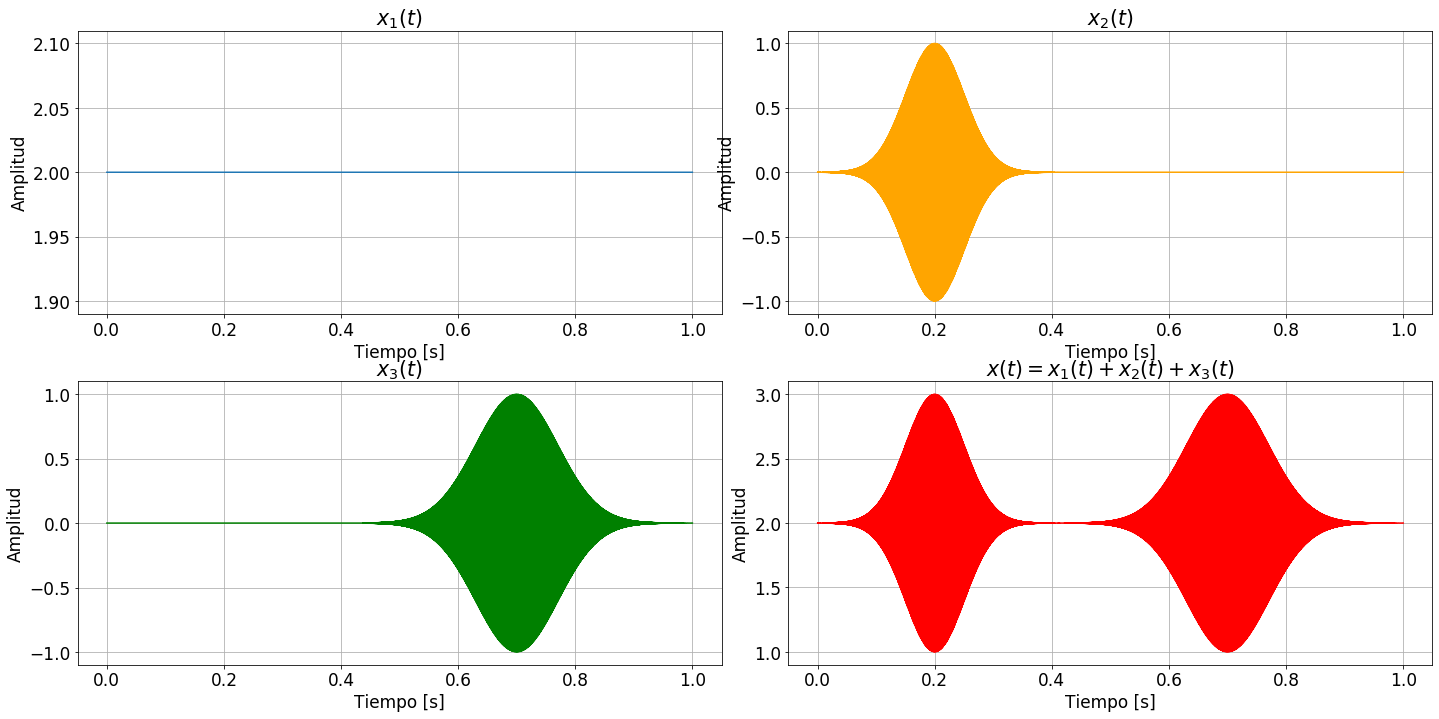

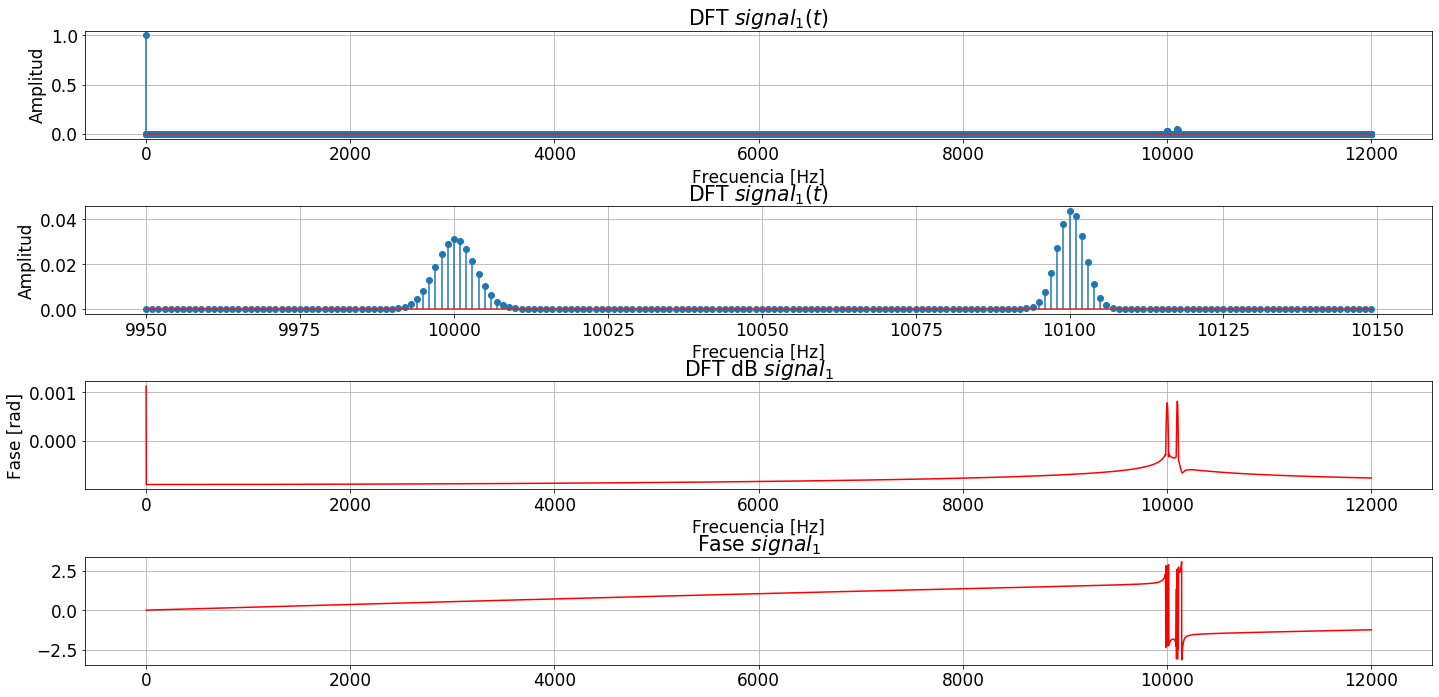

In [4]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(2, 2, sharex=False, sharey=False, figsize=[20, 10])
axs[0, 0].plot(t, x1)
axs[0, 0].set_title('$x_1(t)$')
axs[0, 1].plot(t, x2, color='orange')
axs[0, 1].set_title('$x_2(t)$')
axs[1, 0].plot(t, x3,color='green')
axs[1, 0].set_title('$x_3(t)$')
axs[1, 1].plot(t, signal1, color='red')
axs[1, 1].set_title('$x(t) = x_1(t) + x_2(t) + x_3(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[1].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(ylabel='Amplitud', xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()
        

plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(4, 1, sharex=False, sharey=False, figsize=[20, 10])
axs[0].stem(freq[0:12000], abs(dft_signal1[0:12000])/np.max(abs(dft_signal1)), use_line_collection= True)
axs[0].set_title('DFT $signal_1(t)$')
axs[1].stem(freq[9950:10150], abs(dft_signal1[9950:10150])/np.max(abs(dft_signal1)), use_line_collection= True)
axs[1].set_title('DFT $signal_1(t)$')
axs[2].plot(freq[0:12000], 20*np.log10(abs(dft_signal1[0:12000]))/np.max(abs(dft_signal1)), color='red')
axs[2].set_title('DFT dB $signal_1$')
axs[3].plot(freq[0:12000], np.angle(dft_signal1[0:12000]), color='red')
axs[3].set_title('Fase $signal_1$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[1].set(ylabel='Amplitud', xlabel='Frecuencia [Hz]')
axs.flat[2].set(ylabel='Fase [rad]', xlabel='Frecuencia [Hz]')

for ax in axs.flat:
    ax.grid()
   

### Conclusión: 

En la DFT de las señales se observa leaking debido que la señal original está "cortada" en sus muestras por 44100. Originalmente, el algorimo de la DFT asume que la señal a analizar tiene dominio infinito, y la recorta por la cantidad de las muestras asignadas, de manera que se puede representar como el producto de una ventana rectangular por la señal original, con el ancho de la ventana como el dominio muestral que se quiere analizar, que en nuestro caso es de 44100 muestras.
Luego, al hacer un producto en tiempo, frecuencialmente se puede ver como la convolución de la respuesta de las señales. Por ende, el pulso rectangular con su transformada asociada una función sinc, se convoluciona con las deltas asociadas a las funciones seno y coseno. Lo que da como resultado el corrimiento de las sinc centradas en las frecuencias asociadas a las delta.

COMENTARIOS: 
REVISAR CONCEPTO LEAKING

## <u>Ejercicio 2</u>:
La señal del inciso 1 se modificará cambiando la frecuencia de x3(t), siendo el nuevo valor $f3= 10008.37 \thinspace Hz$, y además se le sumará una componente de ruido aleatorio (normal) $r(t)$, quedando la señal total $x1(t)+x2(t)+x3(t)+ r(t)$, también de 1 segundo de duración y muestreada a Fs=44.1 kHz:

Graficar la magnitud transformada de Fourier (DFT) de la señal total utilizando tres ventanas diferentes: Rectangular, Hann y Blackman. La señal debe multiplicarse por la ventana antes del cálculo de la DFT. Además, graficar en escala de dB la DFT de cada una de las ventanas, y comparar el ancho del lóbulo principal y la atenuación. Determinar cuál ventana elegirían para
diferenciar las componentes de frecuencia (10000 y 10008.37 Hz) y por qué. ¿Cambiarían algún otro parámetro en el cálculo de la DFT para mejorar la resolución?

In [5]:
freq3_bis = 10008.37

#Funcion x3
val3bis = np.sin((np.pi)*2*freq3_bis*t)                 
x3bis = val3bis*val4

#Generación de ruido
noise = 0.01*np.random.normal(0 , 0.01 , T*sr)

#Funciones sumadas
signal2 = x1 + x2 + x3bis + noise


### Creación de las ventanas

In [6]:
window_len= 44100 #ancho de la ventana 

#Ventana rectangular 
w_rectangular= np.ones(window_len)

#Ventana de Hann
w_hann = hann(window_len)

#Ventana de Blackman
w_blackman = blackman(window_len)


### Proceso:
#### Multiplicación de las ventanas con la señal:

In [7]:
signal2_rectangular = signal2 * w_rectangular
signal2_hann = signal2 *  w_hann
signal2_blackman = signal2 * w_blackman

#### Cálculo de las dft

In [8]:
samples= 10000
dft_signal2 = np.fft.rfft(signal2, n=T*sr)
freq_signal2 = np.fft.rfftfreq(T*sr+samples, 1/sr)

dft_signal2_rectangular = np.fft.rfft(signal2_rectangular, n=T*sr)
dft_signal2_hann = np.fft.rfft(signal2_hann, n=T*sr)
dft_signal2_blackman = np.fft.rfft(signal2_blackman, n=T*sr)

dftdB_signal2_rectangular = 20*np.log(abs(dft_signal2_rectangular)+np.finfo(float).eps/max(abs(dft_signal2_rectangular)))
dftdB_signal2_hann = 20*np.log(abs(dft_signal2_hann)+np.finfo(float).eps/max(abs(dft_signal2_hann)))
dftdB_signal2_blackman = 20*np.log(abs(dft_signal2_blackman)+np.finfo(float).eps/max(abs(dft_signal2_blackman)))

dft_rectangular = np.fft.rfft(w_rectangular, n=T*sr+samples)
dft_hann = np.fft.rfft(w_hann, n=T*sr+samples)
dft_blackman = np.fft.rfft(w_blackman, n=T*sr+samples)

dftdB_rectangular= 20*np.log(abs(dft_rectangular)+np.finfo(float).eps/max(abs(dft_rectangular)))
dftdB_hann = 20*np.log(abs(dft_hann)+np.finfo(float).eps/max(abs(dft_hann)))
dftdB_blackman = 20*np.log(abs(dft_blackman)+np.finfo(float).eps/max(abs(dft_blackman)))


#### Plot

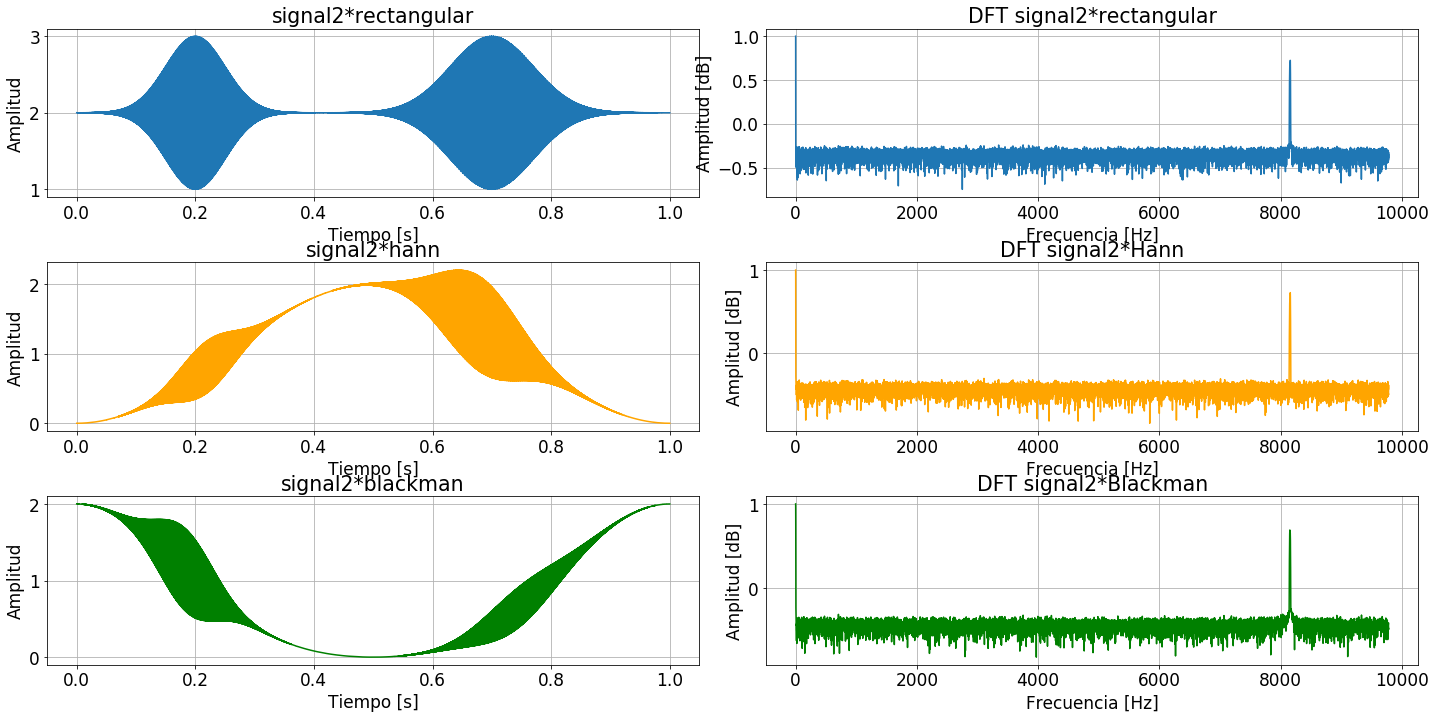

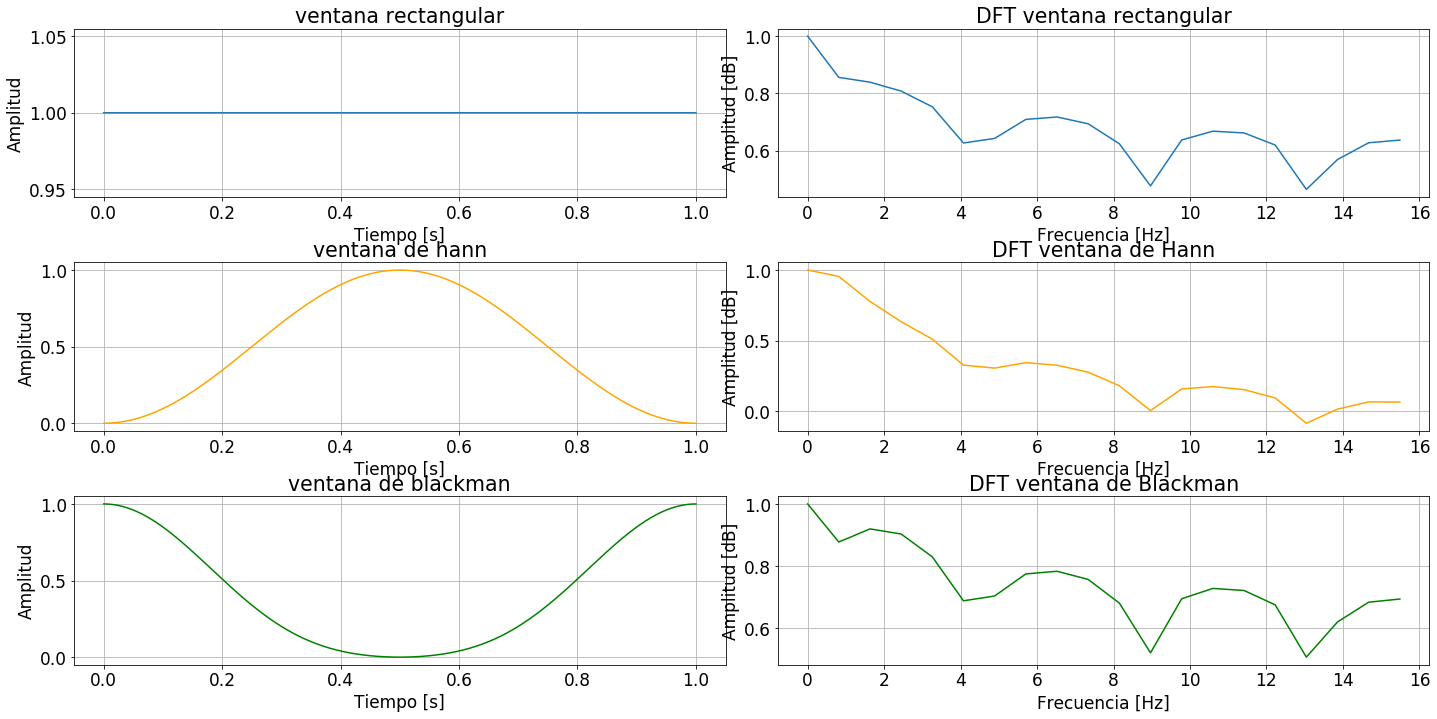

In [9]:
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(3, 2, sharex=False, sharey=False, figsize=[20, 10], constrained_layout=False)
axs[0, 0].plot(t, signal2_rectangular )
axs[0, 0].set_title('signal2*rectangular')
axs[1, 0].plot(t, signal2_hann, color='orange')
axs[1, 0].set_title('signal2*hann')
axs[2, 0].plot(t, signal2_blackman, color='green')
axs[2, 0].set_title('signal2*blackman')
axs[0, 1].plot(freq_signal2[0:12000], dftdB_signal2_rectangular[0:12000]/max(dftdB_signal2_rectangular))
axs[0, 1].set_title('DFT signal2*rectangular')
axs[1, 1].plot(freq_signal2[0:12000], dftdB_signal2_hann[0:12000]/max(dftdB_signal2_hann), color='orange')
axs[1, 1].set_title('DFT signal2*Hann')
axs[2, 1].plot(freq_signal2[0:12000], dftdB_signal2_blackman[0:12000]/max(dftdB_signal2_blackman), color='green')
axs[2, 1].set_title('DFT signal2*Blackman')
fig.tight_layout()

axs[0, 0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs[1, 0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs[2, 0].set(ylabel='Amplitud', xlabel='Tiempo [s]')

axs[0, 1].set(ylabel='Amplitud [dB]', xlabel='Frecuencia [Hz]')
axs[1, 1].set(ylabel='Amplitud [dB]', xlabel='Frecuencia [Hz]')
axs[2, 1].set(ylabel='Amplitud [dB]', xlabel='Frecuencia [Hz]')

for ax in axs.flat:
    ax.grid()
    
plt.rcParams.update({'font.size': 17})
fig, axs = plt.subplots(3, 2, sharex=False, sharey=False, figsize=[20, 10])
axs[0, 0].plot(t, w_rectangular )
axs[0, 0].set_title('ventana rectangular')
axs[1, 0].plot(t, w_hann, color='orange')
axs[1, 0].set_title('ventana de hann')
axs[2, 0].plot(t, w_blackman, color='green')
axs[2, 0].set_title('ventana de blackman')
axs[0, 1].plot(freq_signal2[0:20], dftdB_rectangular[0:20]/max(dftdB_rectangular[0:20]))
axs[0, 1].set_title('DFT ventana rectangular')
axs[1, 1].plot(freq_signal2[0:20],dftdB_hann[0:20]/max(dftdB_hann[0:20]), color='orange')
axs[1, 1].set_title('DFT ventana de Hann')
axs[2, 1].plot(freq_signal2[0:20], dftdB_blackman[0:20]/max(dftdB_blackman[0:20]) , color='green')
axs[2, 1].set_title('DFT ventana de Blackman')
fig.tight_layout()

axs[0, 0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs[1, 0].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs[2, 0].set(ylabel='Amplitud', xlabel='Tiempo [s]')

axs[0, 1].set(ylabel='Amplitud [dB]', xlabel='Frecuencia [Hz]')
axs[1, 1].set(ylabel='Amplitud [dB]', xlabel='Frecuencia [Hz]')
axs[2, 1].set(ylabel='Amplitud [dB]', xlabel='Frecuencia [Hz]')
# axs[0, 1].set_ylim((-250,10))
# axs[1, 1].set_ylim((-500,10))
# axs[2, 1].set_ylim((-250,10))


for ax in axs.flat:
    ax.grid()

### Conclusión: 


- El ancho del lóbulo principal depende de las muestras de la ventana, que están determinandas por la fs. Los lóbulos principales son muy selectivos, ya que su comportamiento es inversamente proporcional al ancho de la ventana. Se observa que cuanto más grande es la ventana, más selectivo resulta el filtro.
- El valor de las componentes de 10 kHz y 10008 kHz luego de ser "moduladas" por el filtro en el eje temporal mediante un producto, sucede que esas componentes están convolucionadas por la respuesta del filtro en en eje de frecuencia. Luego, los valores de las componentes frecuenciales de la señal modulada, centran el lóbulo principal de la fft de la ventana en dicho valor de frecuencia. Se debe buscar la ventana que tenga pendiente más abrupta, para poder distinguir entre las frecuencias medidas.
- Para mejorar la resolución se le agregan ceros a las funciones mediante el parámetro n de la fft.



COMENTARIOS:

- Se puede poner el eje de tiempo y de frecuencia solamente abajo, asi no se solapa con el titulo
- ver qué representa la amplitud de la fft de las ventanas.

## <u>Ejercicio 3</u>:
Ahora, nos quedaremos con la componente x3(t) del inciso anterior para implementar una
interpolación que mejore la resolución en frecuencia del máximo de la DFT. La señal será entonces
de 1 segundo de duración y muestreada a Fs = 44.1 kHz:

$x_3 (t) = sen(2 \pi f_3 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 100008.3 Hz$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$<br>

Se deberá graficar la magnitud, expresada en dB, de la DFT de la señal x3(t) y se determinará la
frecuencia a la que se detecta el máximo de la magnitud, verificándose que no es la frecuencia
exacta. En casos como este, en donde la resolución no es suficiente para discriminar el valor de una
componente de frecuencia, se puede mejorar la determinación de la posición mediante técnicas de
interpolación. Una de las más simples, pero efectivas, es utilizar la interpolación cuadrática [1] que
se calcula con la siguiente ecuación:

[1] $\eta'_{max}= \eta_{max} + \frac{\alpha- \gamma}{2(\alpha-2\beta+ \gamma)}$

En donde

$n_{max}$ : posición encontrada del punto máximo.

$\beta$= g[$n_{max}$] valor absoluto de la magnitud en dB en la posición máxima nmax del pico.

$\alpha$= g[$n_{max}$-1] valor absoluto de la magnitud en dB en la posición anterior al máximo del pico.

$\gamma$= g[$n_{max}$+1] valor absoluto de la magnitud en dB en la posición posterior al máximo del pico.

<u>Nota:</u> esta ecuación está definida para un intervalo unitario (muestreo o resolución). Si dicho valor no es 1,
debe multiplicarse el valor correspondiente al segundo sumando de la ecuación.


### DFT

In [10]:
dft_signal3 = np.fft.rfft(x3bis)
freq_signal3 = np.fft.rfftfreq(len(x3bis), 1/sr)
dftdB_signal3 = 20*np.log((abs(dft_signal3)+ np.finfo(float).eps))


#### Máximo de la dft por métodos:

In [11]:
#Maximo por modo absoluto:
max_abs= max(dftdB_signal3)
muestras_abs = np.where(dftdB_signal3 == max_abs)
freq_abs = muestras_abs[[0][0]]

#Maximo por interpolacion cuadratica   
freq_cuad, maximo_cuad = int_cuadratica(dftdB_signal3)

IndexError: index 0 is out of bounds for axis 0 with size 0

#### Plot

In [ ]:
plt.figure()
plt.plot(freq_signal3, dftdB_signal3)
plt.title('DFT dB signal3')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid()


In [ ]:
print('\nMaximo valor mediante metodo absoluto:',  
      max_abs,
      ", indexado:",
      freq_abs) 

print('\nMaximo valor mediante metodo de interpolacion cuadratica:',
      maximo_cuad,
      ", indexado :",
      freq_cuad) 

### Conclusión

In [ ]:
### hay algo raro porque me da la misma freq pero distinta amplitud, y tiene q ser al revés =?

## <u>Ejercicio 4</u>:

A partir de la respuesta al impulso del filtro de media móvil, dada en el inciso 6 del TP1,
determinar el valor particular de M para que el filtro deje pasar la componente de 10 kHz de la señal
del punto 1, atenuada no más de -3 dB. Graficar la magnitud de la respuesta en frecuencia del filtro
y de la señal filtrada.

In [ ]:
def convImpulseResponse(x,M):
    """
    Funcion que realiza la convolucion entre una entrada y una Respuesta al impulso de 
    ventana M. El modo utilizado para la convolucion es 'valid', para no tener valores
    anómalos en los extremos de la señal resultante

    Parameters
    ----------
    x : TFuncion de entrada
    M : Tamaño de la ventana

    Returns
    -------
    xFiltrada : Funcion convolucionada

    """
    h = np.ones(M)/(M+1)                       # Creo respuesta al impulso de ventana M
    xFiltrada = np.convolve(h,x,'valid')    
    # Realizo convolución
    for n in range(M-1):                       # Agrego el ultimo valor M veces para que la señal resultante me quede del mismo largo que la señal original
        xFiltrada = np.append(xFiltrada,xFiltrada[-1])
    return xFiltrada

def calculadoraDeM(x,frecuencia,atenuacion):
    M = 1
    valorEnFrecuencia = x[frecuencia]
    valorFinal = atenuacion*valorEnFrecuencia
    
    while atenuacion*valorEnFrecuencia > x[frecuencia]:
        x = convImpulseResponse(x,M)
        M += 1
    print(f'El valor de la señal en {frecuencia} Hz es: {round(valorEnFrecuencia,3)} dB,',
          f'con una atenuación de {atenuacion}:',
          round(valorFinal,3),f'dB. Aplicando el filtro pedido con M = {M-1},',
          f'el valor en {frecuencia} Hz resulta:',round(x[frecuencia],2),'dB.')
    
    return M
        



dftdB_signal1= 20*np.log(dft_signal1)

xFiltrada = convImpulseResponse(dftdB_signal1,2)

M = calculadoraDeM(dftdB_signal1, 10000, 0.707)


## <u>Ejercicio 5</u>:

Calcular la convolución lineal del punto 7 del TP1, pero esta vez utilizando el algoritmo de la
DFT. Determinar el largo que deben tener las señales a convolucionar para que el resultado de
utilizar una convolución circular vía DFT sea equivalente a la convolución lineal.



In [ ]:
#Ventana rectangular
M = 2
h = np.ones(M)/M

#Convolucion lineal
conv = np.convolve(signal1,h)
conv = conv[1:-(len(conv)-len(t))]

#Convolucion mediante DFT
y,h_final = convolucion_DFT(signal1,h)
y = y[1:-(len(y)-len(t))]


#### Plot

In [ ]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=[20, 10])
axs[0].plot(t, signal1)
axs[0].set_title('$signal_1(t)$')
axs[1].plot(t[:-(len(t)-len(y))],y, color='orange')
axs[1].set_title('convolucion de $signal_1(t)$ con $h(t)$ mediante $DFT$')
axs[2].plot(t[:-(len(t)-len(conv))],conv, color='violet')
axs[2].set_title('Convolucion lineal de $x(t)$ con $h(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[1].set(ylabel='Amplitud')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')

for ax in axs.flat:
    ax.grid()

### Conclusión

""" OBSERVACION:
    
-Hay que explicar como se llega a la convolucion lineal mediante la DFT 
por medio de la convolucion circular

- Cambiar el docstring
"""

## <u>Ejercicio 6</u>:

Los métodos numéricos para resolver ecuaciones diferenciales deben poder calcular las derivadas mediante algún método aproximado. Uno de los más métodos más conocidos es el de diferencias finitas [2], que si bien es simple, no siempre tiene la precisión deseada. Otro método, es el de la diferenciación en frecuencia que hace uso de las propiedades de la transformada de Fourier [3]. En este punto deberán tomar la señal x2(t) de un 1 segundo de duración y muestreada a Fs=44.1 kHz:

$x_2 (t) = cos(2 \pi f_2 t) e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;f_2 = 10kHz$ $\mu_2 = 0.2s$ $\sigma_2 = 0.05s$<br> 

y calcular la derivada analítica, la primera diferencia hacia adelante (forward) y la derivada por el método de la transformada de Fourier. Graficar los resultados y compara la aproximación de la derivada por los dos métodos numéricos. Se puede seguir la referencia [4] para la implementación.


In [ ]:
da = -2*np.pi*freq2*np.sin(2*np.pi*freq2*t)*val2 - (2*(t-u2)/(2*s2))*val1*val2
df = derivada_finita(x2)

#### Plot

In [ ]:
plt.figure()
plt.plot(t[0:len(df)], df)
print(max(df))

plt.figure()
plt.plot(t[0:len(da)], da)
print(max(da))

## <u>Ejercicio 7</u>:

A la señal del inciso 1 de este TP calcular y graficar la magnitud en dB y la fase de su STFT. Realizar tres gráficos cambiando el tipo de ventana y el largo del cálculo de la FFT. Determinar
alguna combinación de las tres anteriores que sea (parezca) mejor para representar a la señal en estudio.

In [ ]:
plt.figure(1)

f1, t1, Zxx1 = signal.stft(signal1 ,sr,window = 'blackman',nperseg = 600,noverlap = 500 ,nfft = 5000)
f2, t2, Zxx2 = signal.stft(signal1 ,sr,window = 'hann',nperseg = 600,noverlap = 500 ,nfft = 5000)
f3, t3, Zxx3 = signal.stft(signal1 ,sr,window = 'bartlett',nperseg = 700,noverlap = 600 ,nfft = 5000)


plt.figure(figsize=(20,16))
plt.pcolormesh(t1, f1, 20*np.log(abs(Zxx1)))
plt.colorbar(format='%+2.0f dB')
plt.ylim(0,17500)
plt.title("Magnitud de STFT utilizando una ventana de Blackman")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.show()

plt.figure(figsize=(20,16))
plt.pcolormesh(t2, f2, 20*np.log(abs(Zxx2)))
plt.ylim(0,17500)
plt.colorbar(format='%+2.0f dB')
plt.title("Magnitud de STFT utilizando una ventana de Hann")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.show()

plt.figure(figsize=(20,16))
plt.pcolormesh(t3, f3, 20*np.log(abs(Zxx3)))
plt.colorbar(format='%+2.0f dB')
plt.ylim(0,17500)
plt.title("Magnitud de STFT utilizando una ventana de Bartlett")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.show()

plt.figure(figsize=(20,16))
plt.pcolormesh(t1, f1, np.angle(Zxx1))
plt.colorbar()
plt.title("Fase de STFT utilizando una ventana de Blackman")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.show()

plt.figure(figsize=(20,16))
plt.pcolormesh(t2, f2, np.angle(Zxx2))
plt.colorbar()
plt.title("Fase de STFT utilizando una ventana de Hann")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.show()

plt.figure(figsize=(20,16))
plt.pcolormesh(t3, f3, np.angle(Zxx3))
plt.colorbar()
plt.title("Fase de STFT utilizando una ventana de Bartlett")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia [Hz]")
plt.show()




